In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.options.display.float_format = '{:,.2f}'.format


#carregar os dados entender formato do dataset
df = pd.read_csv('./exercicio_DSteam_shared4-master/_data/dataset_2021-5-26-10-14.csv', sep='\t', encoding='utf-8')

print(df.head())

   default_3months  ioi_36months  ioi_3months  valor_por_vencer  \
0                0         58.00        18.24              0.00   
1                1         16.05         7.50        224,132.85   
2                0         13.25         3.90        513,043.83   
3                0        136.93        10.14         23,273.64   
4                0        140.33        17.65              0.00   

   valor_vencido  valor_quitado  quant_protestos  valor_protestos  \
0           0.00     242,100.70                0             0.00   
1           0.00   4,960,846.21                0             0.00   
2           0.00     158,631.93                1         1,800.00   
3           0.00     669,644.16                0             0.00   
4           0.00       2,010.56                0             0.00   

   quant_acao_judicial  acao_judicial_valor  ...  dividas_vencidas_qtd  \
0                    0                 0.00  ...                     0   
1                    0            

In [3]:
# Verificação dos tipos de dados e os valores que estão nulos
df.info()


df = df.replace("missing", pd.NA)

print("\nValores faltantes após substituição:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117273 entries, 0 to 117272
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   default_3months              117273 non-null  int64  
 1   ioi_36months                 117273 non-null  float64
 2   ioi_3months                  117273 non-null  float64
 3   valor_por_vencer             117273 non-null  float64
 4   valor_vencido                117273 non-null  float64
 5   valor_quitado                117273 non-null  float64
 6   quant_protestos              117273 non-null  int64  
 7   valor_protestos              117273 non-null  float64
 8   quant_acao_judicial          117273 non-null  int64  
 9   acao_judicial_valor          117273 non-null  float64
 10  participacao_falencia_valor  117273 non-null  float64
 11  dividas_vencidas_valor       117273 non-null  float64
 12  dividas_vencidas_qtd         117273 non-null  int64  
 13 

In [4]:
# agora explorar as colunas com valores nulos
df['opcao_tributaria_is_missing'] = df['opcao_tributaria'].isna()
df['forma_pagamento_is_missing'] = df['forma_pagamento'].isna()
df['tipo_sociedade_is_missing'] = df['tipo_sociedade'].isna()
df['atividade_principal_is_missing'] = df['atividade_principal'].isna()

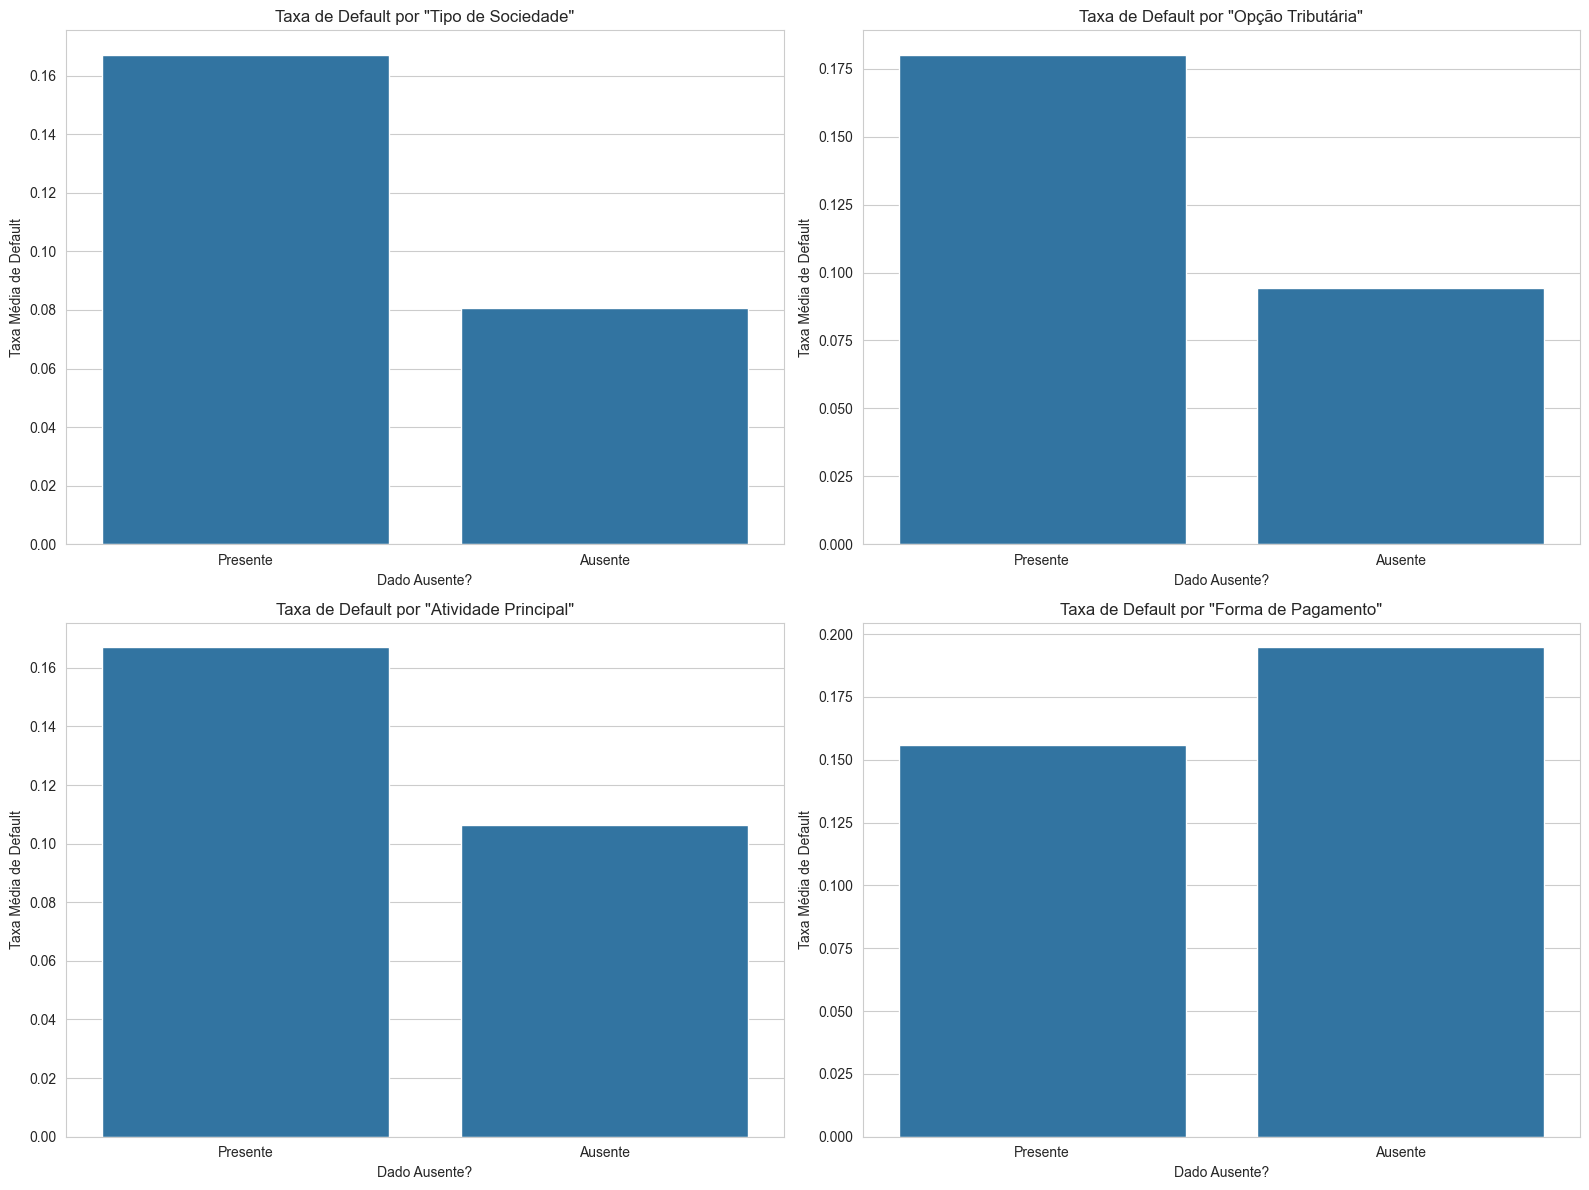

In [5]:
# Representação visual dos colunas, valores nulos x não nulo

sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(x=df['tipo_sociedade_is_missing'], y=df['default'], errorbar=None, ax=axes[0, 0])
axes[0, 0].set_title('Taxa de Default por "Tipo de Sociedade"')
axes[0, 0].set_xlabel('Dado Ausente?')
axes[0, 0].set_ylabel('Taxa Média de Default')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['Presente', 'Ausente'])

sns.barplot(x=df['opcao_tributaria_is_missing'], y=df['default'], errorbar=None, ax=axes[0, 1])
axes[0, 1].set_title('Taxa de Default por "Opção Tributária"')
axes[0, 1].set_xlabel('Dado Ausente?')
axes[0, 1].set_ylabel('Taxa Média de Default')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['Presente', 'Ausente'])

sns.barplot(x=df['atividade_principal_is_missing'], y=df['default'], errorbar=None, ax=axes[1, 0])
axes[1, 0].set_title('Taxa de Default por "Atividade Principal"')
axes[1, 0].set_xlabel('Dado Ausente?')
axes[1, 0].set_ylabel('Taxa Média de Default')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['Presente', 'Ausente'])


sns.barplot(x=df['forma_pagamento_is_missing'], y=df['default'], errorbar=None, ax=axes[1, 1])
axes[1, 1].set_title('Taxa de Default por "Forma de Pagamento"')
axes[1, 1].set_xlabel('Dado Ausente?')
axes[1, 1].set_ylabel('Taxa Média de Default')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Presente', 'Ausente'])


plt.tight_layout()


plt.show()

In [6]:
# Quais vairaveis tem mais correlação com default
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'default' in numeric_cols:
    numeric_cols.remove('default')

correlations = df[numeric_cols + ['default']].corr()['default'].abs().sort_values(ascending=False)
top_corr = correlations[1:11]

print(top_corr.to_string())

default_3months           0.22
month                     0.09
ioi_36months              0.05
valor_quitado             0.04
year                      0.03
valor_por_vencer          0.02
quant_acao_judicial       0.01
falencia_concordata_qtd   0.01
acao_judicial_valor       0.01
valor_vencido             0.01


In [7]:
# Função para análise de como as categorias influenciam
def analise_categorica(coluna, min_count=30):
    resultado = df.groupby(coluna)['default'].agg(['count', 'mean']).round(3)
    resultado = resultado[resultado['count'] >= min_count]
    resultado.columns = ['Volume', 'Taxa_Default']
    return resultado.sort_values('Taxa_Default', ascending=False)

# Análise por tipo de sociedade
tipo_sociedade_analysis = analise_categorica('tipo_sociedade')
print("Tipo de sociedade")
print(tipo_sociedade_analysis.head(8).to_string())

# Análise por forma de pagamento
forma_pagamento_analysis = analise_categorica('forma_pagamento')
print("Forma de Pagamento")
print(forma_pagamento_analysis.to_string())

Tipo de sociedade
                                                Volume  Taxa_Default
tipo_sociedade                                                      
sociedade simples limitada                         121          0.64
organizacao religiosa                               33          0.33
empresario-mei(microempreendedor individual)      6886          0.24
empresario (individual)                          27055          0.21
cooperativa                                        567          0.15
empresa individual respons limitada empresaria   19201          0.15
sociedade anonima fechada                         2482          0.15
sociedade empresaria limitada                    60020          0.14
Forma de Pagamento
                                      Volume  Taxa_Default
forma_pagamento                                           
60,12,30                                  45          0.60
28/42/56/70/84/98/112                    134          0.58
105/120/135                          

In [8]:
# Criar variáveis simples de risco
df['tem_restricoes'] = ((df['quant_protestos'] > 0) |
                        (df['quant_acao_judicial'] > 0) |
                        (df['dividas_vencidas_qtd'] > 0))

df['situacao_pagamentos'] = pd.cut(df['valor_vencido'],
                                   bins=[0, 1, 1000, np.inf],
                                   labels=['Sem_Pendencias', 'Baixas_Pendencias', 'Altas_Pendencias'])

print("Restição no Serasa")
restricao_analysis = df.groupby('tem_restricoes')['default'].agg(['count', 'mean']).round(3)
restricao_analysis.columns = ['Volume', 'Taxa_Default']
print(restricao_analysis.to_string())

situacao_analysis = df.groupby('situacao_pagamentos')['default'].agg(['count', 'mean']).round(3)
situacao_analysis.columns = ['Volume', 'Taxa_Default']
print(situacao_analysis.to_string())

Restição no Serasa
                Volume  Taxa_Default
tem_restricoes                      
False           112032          0.17
True              5241          0.11
                     Volume  Taxa_Default
situacao_pagamentos                      
Sem_Pendencias           42          0.50
Baixas_Pendencias      5588          0.44
Altas_Pendencias       6795          0.25


C:\Users\enzo.chrispim\AppData\Local\Temp\ipykernel_2584\79087363.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  situacao_analysis = df.groupby('situacao_pagamentos')['default'].agg(['count', 'mean']).round(3)


In [9]:
df['default'] = df['default'].astype(int)
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
monthly_stats = df.groupby(['year', 'month']).agg({
    'default': ['count', 'mean']
}).round(3)
monthly_stats.columns = ['Total_Pedidos', 'Taxa_Default']


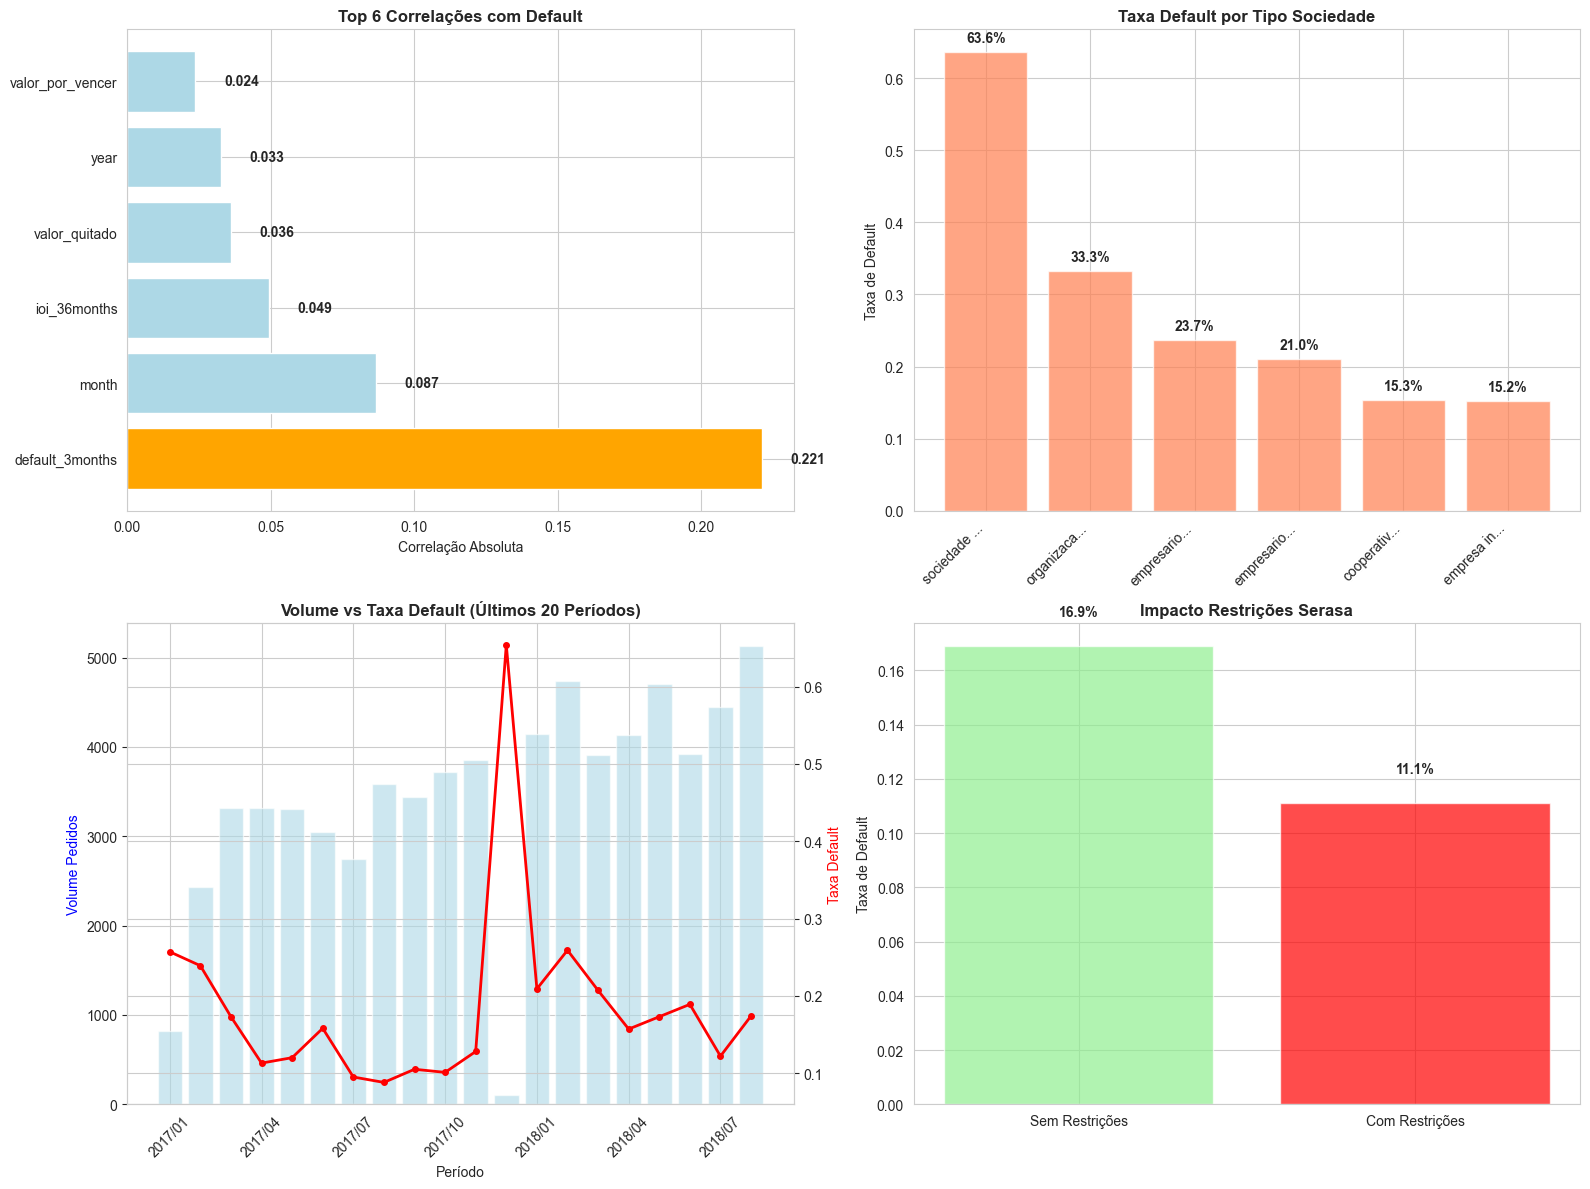

In [10]:

# Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


# Gráfico 1: Top correlações
ax1 = axes[0, 0]
top_corr_plot = top_corr.head(6)
colors = ['red' if x > 0.3 else 'orange' if x > 0.1 else 'lightblue' for x in top_corr_plot.values]
bars1 = ax1.barh(range(len(top_corr_plot)), top_corr_plot.values, color=colors)
ax1.set_yticks(range(len(top_corr_plot)))
ax1.set_yticklabels(top_corr_plot.index, fontsize=10)
ax1.set_title('Top 6 Correlações com Default', fontweight='bold')
ax1.set_xlabel('Correlação Absoluta')

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2., f'{width:.3f}',
             ha='left', va='center', fontweight='bold')

# Gráfico 2: Default por tipo de sociedade (top 6)
ax2 = axes[0, 1]
tipo_plot = tipo_sociedade_analysis.head(6)
bars2 = ax2.bar(range(len(tipo_plot)), tipo_plot['Taxa_Default'],
                color='coral', alpha=0.7)
ax2.set_title('Taxa Default por Tipo Sociedade', fontweight='bold')
ax2.set_ylabel('Taxa de Default')
ax2.set_xticks(range(len(tipo_plot)))
ax2.set_xticklabels([x[:10] + '...' if len(x) > 10 else x for x in tipo_plot.index],
                    rotation=45, ha='right')

# Adicionar valores
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Série temporal (volume vs default)
ax3 = axes[1, 0]
monthly_plot = monthly_stats.head(20)
months = range(len(monthly_plot))

# Barras para volume
bars3 = ax3.bar(months, monthly_plot['Total_Pedidos'], alpha=0.6, color='lightblue',
                label='Volume Pedidos')

# Linha para taxa de default
ax3_twin = ax3.twinx()
line3 = ax3_twin.plot(months, monthly_plot['Taxa_Default'], color='red',
                      linewidth=2, marker='o', markersize=4, label='Taxa Default')

ax3.set_title('Volume vs Taxa Default (Últimos 20 Períodos)', fontweight='bold')
ax3.set_xlabel('Período')
ax3.set_ylabel('Volume Pedidos', color='blue')
ax3_twin.set_ylabel('Taxa Default', color='red')
ax3.set_xticks(months[::3])
ax3.set_xticklabels([f"{monthly_plot.index[i][0]}/{monthly_plot.index[i][1]:02d}"
                     for i in months[::3]], rotation=45)

# Gráfico 4: Impacto das restrições Serasa
ax4 = axes[1, 1]
restricao_plot = restricao_analysis
bars4 = ax4.bar(['Sem Restrições', 'Com Restrições'], restricao_plot['Taxa_Default'],
                color=['lightgreen', 'red'], alpha=0.7)
ax4.set_title('Impacto Restrições Serasa', fontweight='bold')
ax4.set_ylabel('Taxa de Default')

# Adicionar valores
for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
#Verificando a presença de outliers na coluna valor quitado, diferença entre média x mediana e valores altos
df['valor_quitado'].describe([0.95, 0.99])

count       117,273.00
mean      1,085,557.34
std       7,444,825.41
min               0.00
50%          81,348.78
95%       2,756,866.38
99%      19,030,026.63
max     460,320,322.80
Name: valor_quitado, dtype: float64